**DATA PRE-PROCESSING**

In [ ]:
# Read CSV as pandas data frame
import pandas as pd
df = pd.read_csv('/content/123.csv')
df

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
63099,Global,WLD,2017,36096.73928,14506.97381,12242.62794,7144.928128,1507.923185,391.992176,302.294047,4.749682
63100,Global,WLD,2018,36826.50660,14746.83069,12266.01629,7529.846784,1569.218392,412.115746,302.478706,4.792753
63101,Global,WLD,2019,37082.55897,14725.97803,12345.65337,7647.528220,1617.506786,439.253991,306.638573,4.775633
63102,Global,WLD,2020,35264.08573,14174.56401,11191.80855,7556.290283,1637.537532,407.583673,296.301685,4.497423


In [ ]:
#There are total 232 countries in the dataset and each country co2 emission records from 1750 to 2021
df['Country'].value_counts()

Afghanistan    272
Peru           272
Niger          272
Nigeria        272
Niue           272
              ... 
Greenland      272
Grenada        272
Guadeloupe     272
Guatemala      272
Global         272
Name: Country, Length: 232, dtype: int64

In [ ]:
df.isnull().sum()

Country                   0
ISO 3166-1 alpha-3     1632
Year                      0
Total                   200
Coal                  41360
Oil                   41387
Gas                   41486
Cement                42290
Flaring               41554
Other                 61484
Per Capita            44130
dtype: int64

From the above we can see that there are many null values spread across the dataset and dropping them would take out large portion of valuable data and we may miss the key insights from it.

In [ ]:
df['Total'].value_counts()

0.000000        41207
0.003664          195
0.010992          159
0.047632          116
0.007328          114
                ...  
27.749511           1
31.477311           1
37.131214           1
36.061767           1
37123.850350        1
Name: Total, Length: 16193, dtype: int64

Instead of dropping null values from every column, the ideal step is to drop the values with zero in total column (Doing so, interprets that either all the column values contributing to the co2 emission is either zero or there are no emissions from that category at that period of time.

In [ ]:
#we can clearly see most of the columns are NaN when total is 0 
df[df['Total']==0] 

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
62436,Zimbabwe,ZWE,1898,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62437,Zimbabwe,ZWE,1899,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62438,Zimbabwe,ZWE,1900,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62439,Zimbabwe,ZWE,1901,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Slicing the data into a new dataframe
df1 = df[df['Total']>0.00000]
df1

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
199,Afghanistan,AFG,1949,0.014656,0.014656,0.000000,0.000000,0.000000,0.000000,NaN,NaN
200,Afghanistan,AFG,1950,0.084272,0.021068,0.063204,0.000000,0.000000,0.000000,NaN,0.011266
201,Afghanistan,AFG,1951,0.091600,0.025648,0.065952,0.000000,0.000000,0.000000,NaN,0.012098
202,Afghanistan,AFG,1952,0.091600,0.031708,0.059892,0.000000,0.000000,0.000000,NaN,0.011946
203,Afghanistan,AFG,1953,0.106256,0.037949,0.068307,0.000000,0.000000,0.000000,NaN,0.013685
...,...,...,...,...,...,...,...,...,...,...,...
63099,Global,WLD,2017,36096.739280,14506.973810,12242.627940,7144.928128,1507.923185,391.992176,302.294047,4.749682
63100,Global,WLD,2018,36826.506600,14746.830690,12266.016290,7529.846784,1569.218392,412.115746,302.478706,4.792753
63101,Global,WLD,2019,37082.558970,14725.978030,12345.653370,7647.528220,1617.506786,439.253991,306.638573,4.775633
63102,Global,WLD,2020,35264.085730,14174.564010,11191.808550,7556.290283,1637.537532,407.583673,296.301685,4.497423


In [ ]:
#After dropping the records which are not contributing towards the total you can see there is a significant change in Null values
df1.isnull().sum()

Country                   0
ISO 3166-1 alpha-3       84
Year                      0
Total                     0
Coal                     72
Oil                     105
Gas                     204
Cement                 4215
Flaring                 272
Other                 20077
Per Capita             4431
dtype: int64

In [ ]:
#Dropping the variable Other because 92.5% of the column are having null values
#Because a column with a large number of missing values may not provide useful information, and imputing missing values may introduce bias into the analysis.
df1 = df1.drop(['Other','ISO 3166-1 alpha-3'], axis=1)
df1.head()

,Country,Year,Total,Coal,Oil,Gas,Cement,Flaring,Per Capita
199,Afghanistan,1949,0.014656,0.014656,0.000000,0.0,0.0,0.0,NaN
200,Afghanistan,1950,0.084272,0.021068,0.063204,0.0,0.0,0.0,0.011266
201,Afghanistan,1951,0.091600,0.025648,0.065952,0.0,0.0,0.0,0.012098
202,Afghanistan,1952,0.091600,0.031708,0.059892,0.0,0.0,0.0,0.011946
203,Afghanistan,1953,0.106256,0.037949,0.068307,0.0,0.0,0.0,0.013685


In [ ]:
df1.shape

(21697, 9)

In [ ]:
#These fewer null values can be imputed 
df1.isnull().sum()

Country          0
Year             0
Total            0
Coal            72
Oil            105
Gas            204
Cement        4215
Flaring        272
Per Capita    4431
dtype: int64

In [ ]:
#datatypes of variables
df1.dtypes

Country        object
Year            int64
Total         float64
Coal          float64
Oil           float64
Gas           float64
Cement        float64
Flaring       float64
Per Capita    float64
dtype: object

In [ ]:
#Slicing all the numerical data into a new dataframe for imputation
df2 = df1.iloc[ : , 1:]
df2.head()

,Year,Total,Coal,Oil,Gas,Cement,Flaring,Per Capita
199,1949,0.014656,0.014656,0.000000,0.0,0.0,0.0,NaN
200,1950,0.084272,0.021068,0.063204,0.0,0.0,0.0,0.011266
201,1951,0.091600,0.025648,0.065952,0.0,0.0,0.0,0.012098
202,1952,0.091600,0.031708,0.059892,0.0,0.0,0.0,0.011946
203,1953,0.106256,0.037949,0.068307,0.0,0.0,0.0,0.013685


In [ ]:
!pip install fancyimpute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Iterative imputer is a type of imputation method used to fill in missing values in a dataset. It is based on building a model to predict the missing values using the observed values in the dataset. The iterative imputer works by cycling through each variable with missing values and predicting the missing values using the other variables in the dataset. is a popular imputation method in machine learning and data analysis, as it can produce accurate imputations even when there are complex relationships between the variables.

In [ ]:
import pandas as pd
from fancyimpute import IterativeImputer

# create an instance of the MICE imputer
mice_imputer = IterativeImputer()

# impute the missing values using MICE
imputed_data = mice_imputer.fit_transform(df2)

# create a new dataframe with the imputed data
df2 = pd.DataFrame(imputed_data, columns=df2.columns)

# print the imputed dataframe
print("Imputed dataframe:")
print(df2)


Imputed dataframe:
         Year         Total          Coal           Oil          Gas  \
0      1949.0      0.014656      0.014656      0.000000     0.000000   
1      1950.0      0.084272      0.021068      0.063204     0.000000   
2      1951.0      0.091600      0.025648      0.065952     0.000000   
3      1952.0      0.091600      0.031708      0.059892     0.000000   
4      1953.0      0.106256      0.037949      0.068307     0.000000   
...       ...           ...           ...           ...          ...   
21692  2017.0  36096.739280  14506.973810  12242.627940  7144.928128   
21693  2018.0  36826.506600  14746.830690  12266.016290  7529.846784   
21694  2019.0  37082.558970  14725.978030  12345.653370  7647.528220   
21695  2020.0  35264.085730  14174.564010  11191.808550  7556.290283   
21696  2021.0  37123.850350  14979.598080  11837.159120  7921.829472   

            Cement     Flaring  Per Capita  
0         0.000000    0.000000    4.257393  
1         0.000000    0.00

In [ ]:
#All the Null values are 
df2.isnull().sum()

Year          0
Total         0
Coal          0
Oil           0
Gas           0
Cement        0
Flaring       0
Per Capita    0
dtype: int64

In [ ]:
df2['Country'] = df1['Country'].values

In [ ]:
#Re-Calculating the new Total after imputation
df2['Total'] = df2['Per Capita'] + df2['Flaring'] + df2['Cement'] + df2['Gas'] + df2['Oil'] + df2['Coal']  

In [ ]:
#Final Dataset after Data Pre-Processing
df2.head()

,Year,Total,Coal,Oil,Gas,Cement,Flaring,Per Capita,Country
0,1949.0,4.272049,0.014656,0.000000,0.0,0.0,0.0,4.257393,Afghanistan
1,1950.0,0.095538,0.021068,0.063204,0.0,0.0,0.0,0.011266,Afghanistan
2,1951.0,0.103698,0.025648,0.065952,0.0,0.0,0.0,0.012098,Afghanistan
3,1952.0,0.103546,0.031708,0.059892,0.0,0.0,0.0,0.011946,Afghanistan
4,1953.0,0.119941,0.037949,0.068307,0.0,0.0,0.0,0.013685,Afghanistan


Dataset with other type of imputation (replacing null values with mean of the variable)

In [ ]:
import pandas as pd

# Load the dataset
data = df1.copy()

# Identify the variables with missing values
missing_vars = ['Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Per Capita']

# Calculate the mean of each variable
mean_vals = data[missing_vars].mean()

# Impute missing values with mean
data[missing_vars] = data[missing_vars].fillna(mean_vals)

# Optionally, create a new variable to indicate which values were imputed
data['var1_imputed'] = data['Coal'].isna().astype(int)

In [ ]:
data.isnull().sum()

Country         0
Year            0
Total           0
Coal            0
Oil             0
Gas             0
Cement          0
Flaring         0
Per Capita      0
var1_imputed    0
dtype: int64

In [ ]:
data['Total'] = data['Per Capita'] + data['Flaring'] + data['Cement'] + data['Gas'] + data['Oil'] + data['Coal'] 

In [ ]:
#Mean of the total before imputation
df1['Total'].mean()

160.1078517176568

In [ ]:
#Mean of the Total after imputation using itterative imputer
df2['Total'].mean()

163.72561051697912

In [ ]:
#Mean of the Total after imputation using mean of the variable
data['Total'].mean()

165.82881500206983

We can consider imputation using itterative imputer because imputation using mean of the variable may introduce bias, ignores the relationships, distorts the distribution and reduce the variance.

In [ ]:
# Export dataframe "df" to an excel workbook and download to a local folder
from google.colab import files 
df2.to_csv("cleaned_123.csv")
files.download("cleaned_123.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
clean_df=pd.read_csv('/content/cleaned_123.csv')

In [ ]:
clean_df.head()

,Unnamed: 0,Year,Total,Coal,Oil,Gas,Cement,Flaring,Per Capita,Country
0,0,1949.0,4.272049,0.014656,0.000000,0.0,0.0,0.0,4.257393,Afghanistan
1,1,1950.0,0.095538,0.021068,0.063204,0.0,0.0,0.0,0.011266,Afghanistan
2,2,1951.0,0.103698,0.025648,0.065952,0.0,0.0,0.0,0.012098,Afghanistan
3,3,1952.0,0.103546,0.031708,0.059892,0.0,0.0,0.0,0.011946,Afghanistan
4,4,1953.0,0.119941,0.037949,0.068307,0.0,0.0,0.0,0.013685,Afghanistan


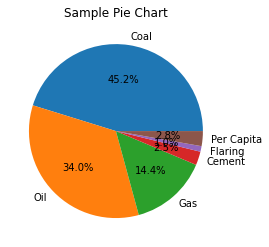

In [ ]:
import matplotlib.pyplot as plt

# Sample data
labels = ['Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Per Capita']
sizes = [clean_df['Coal'].sum(), clean_df['Oil'].sum(), clean_df['Gas'].sum(), clean_df['Cement'].sum(), clean_df['Flaring'].sum(), clean_df['Per Capita'].sum()]

# Create pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

# Add title
ax.set_title('Pie Chart showing the percentage of emission through out the years')

# Show plot
plt.show()
